In [7]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox,zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,r2_score

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor



df=pd.read_csv('sonar-dataset.csv',header=None)
df


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [8]:
def findType(df,col):
    print("Column : ",col,"  Data type : ",df.dtypes)

In [9]:
df.columns


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [10]:
for col_ in df.columns:
    findType(df[col_],col_)

Column :  0   Data type :  float64
Column :  1   Data type :  float64
Column :  2   Data type :  float64
Column :  3   Data type :  float64
Column :  4   Data type :  float64
Column :  5   Data type :  float64
Column :  6   Data type :  float64
Column :  7   Data type :  float64
Column :  8   Data type :  float64
Column :  9   Data type :  float64
Column :  10   Data type :  float64
Column :  11   Data type :  float64
Column :  12   Data type :  float64
Column :  13   Data type :  float64
Column :  14   Data type :  float64
Column :  15   Data type :  float64
Column :  16   Data type :  float64
Column :  17   Data type :  float64
Column :  18   Data type :  float64
Column :  19   Data type :  float64
Column :  20   Data type :  float64
Column :  21   Data type :  float64
Column :  22   Data type :  float64
Column :  23   Data type :  float64
Column :  24   Data type :  float64
Column :  25   Data type :  float64
Column :  26   Data type :  float64
Column :  27   Data type :  float64
Co

In [11]:
df.shape

(208, 61)

In [12]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

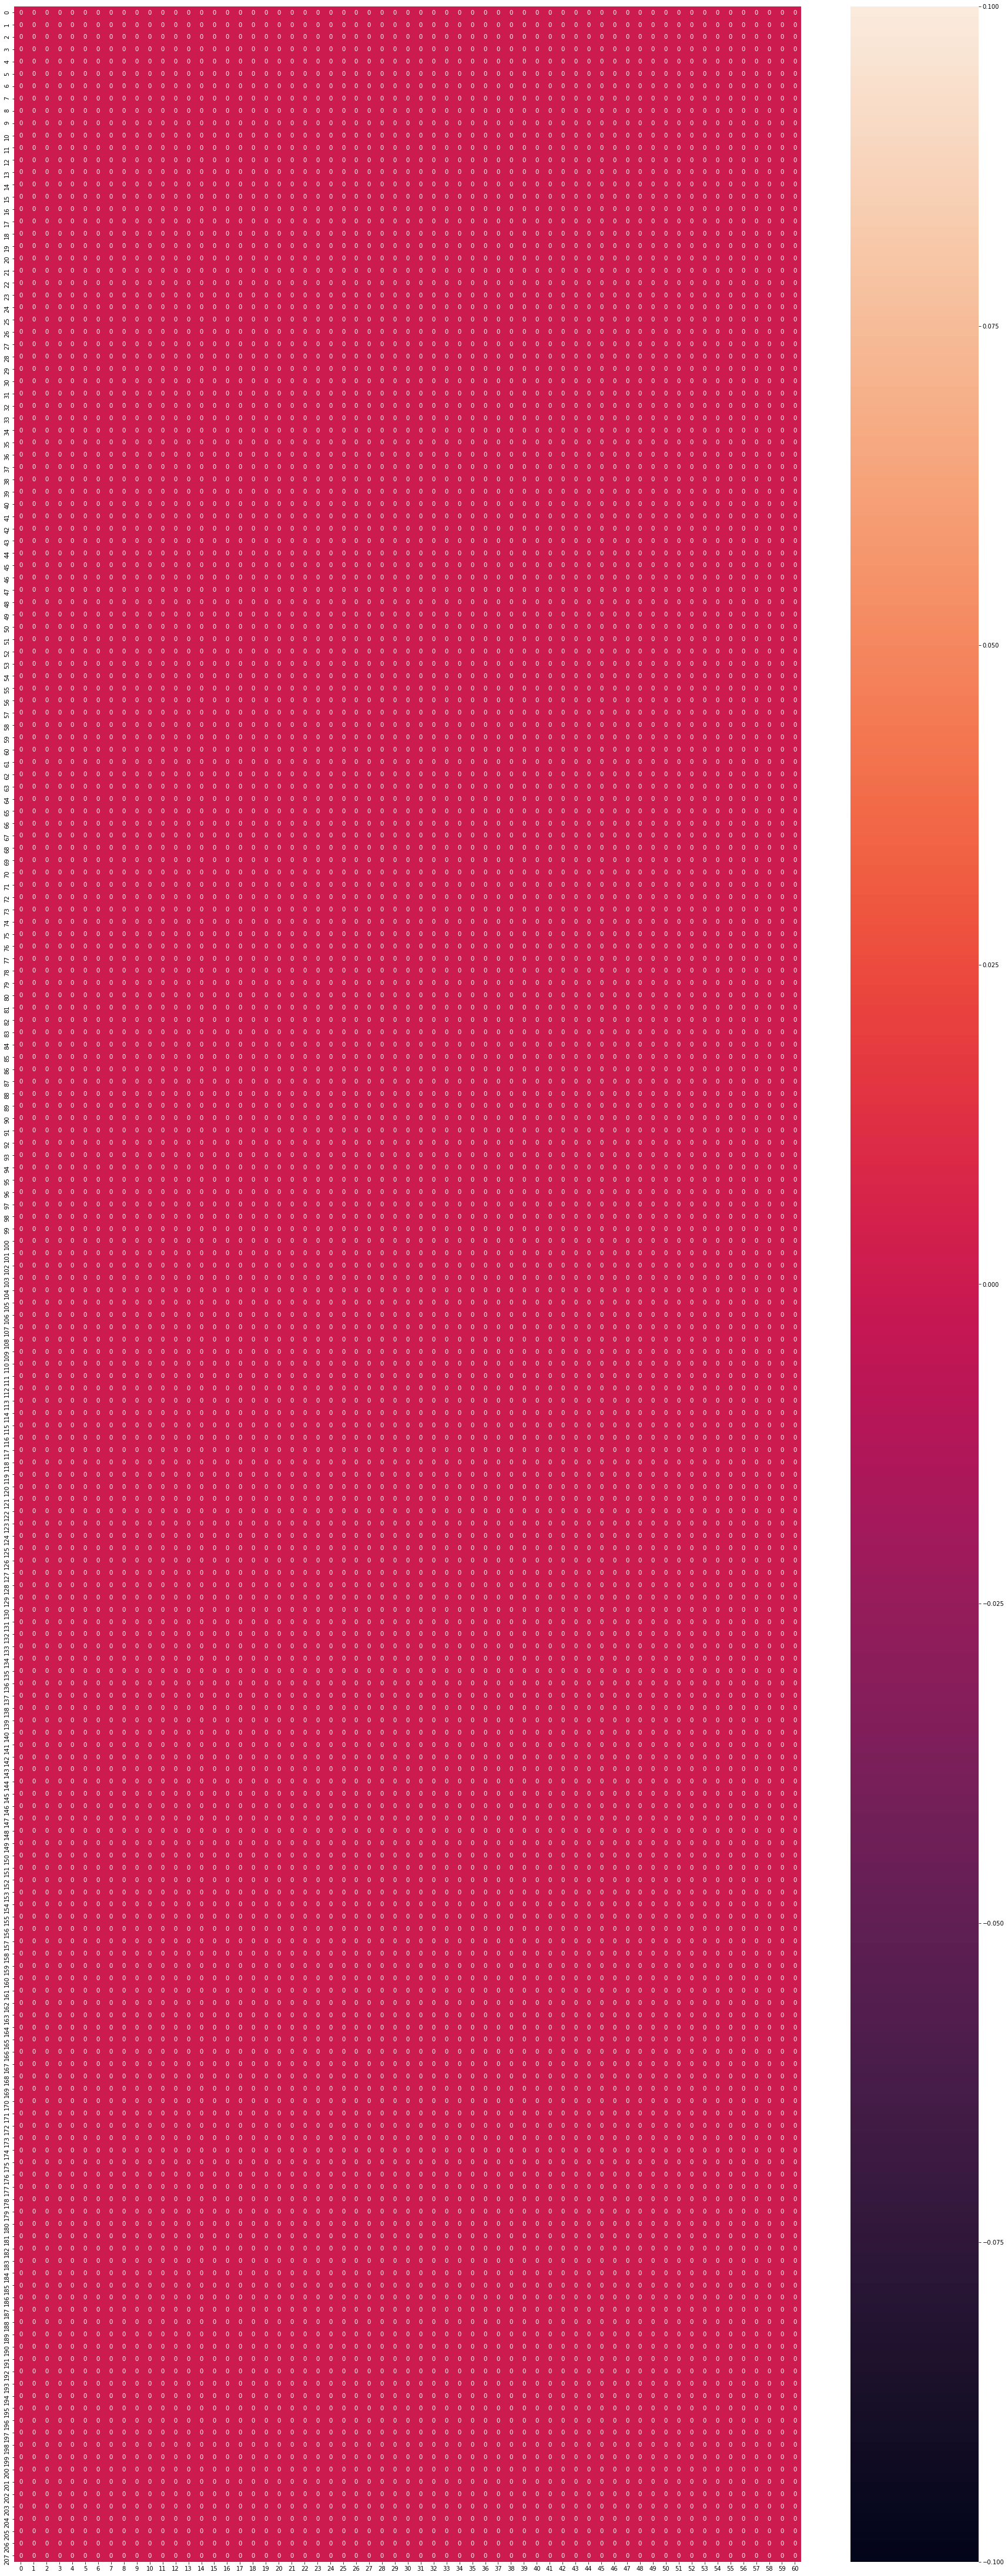

In [13]:
plt.figure(figsize=(30,80))
sns.heatmap(df.isnull(),annot=True)

In [14]:
def checkNull(df,col):
    if(df.isna().sum()>0):
        print("column: ",col," null count: ",df.isna().sum())
        df=df.replace(np.NaN,0)
        
        

In [15]:
for col_ in df.columns:
    checkNull(df[col_],col_)

In [16]:
def checkZero(df,col):
    if(df.isin([0]).any()):
        print("column: ",col," contains 0 value ",df.isin([0]).any().sum())
        return col
        

In [17]:
col_list=[]
return_col="";
for col_ in df.columns:
    return_col=checkZero(df[col_],col_)
    if(return_col!=None):
         col_list.append(return_col)
  
        
    
print(col_list)    

column:  42  contains 0 value  1
column:  43  contains 0 value  1
column:  44  contains 0 value  1
column:  45  contains 0 value  1
column:  46  contains 0 value  1
column:  47  contains 0 value  1
column:  48  contains 0 value  1
column:  49  contains 0 value  1
column:  50  contains 0 value  1
[42, 43, 44, 45, 46, 47, 48, 49, 50]


In [18]:
#replacing 0 values instaed of removing records
def replaceZero(df,col):
    imp = SimpleImputer(missing_values=0,strategy="mean")
    imp.fit(df[[col]])
    df[col]=imp.fit_transform(df[[col]]).ravel()
    print(col,df[col].value_counts())



In [19]:
for col_ in col_list:
    replaceZero(df,col_)

42 0.2728    2
0.2121    2
0.1552    2
0.1653    1
0.4004    1
         ..
0.3054    1
0.4302    1
0.4372    1
0.2596    1
0.1875    1
Name: 42, Length: 205, dtype: int64
43 0.2527    2
0.1381    2
0.3202    2
0.0845    2
0.1705    2
         ..
0.1424    1
0.1925    1
0.3363    1
0.2887    1
0.1491    1
Name: 43, Length: 196, dtype: int64
44 0.0758    2
0.1192    2
0.1155    2
0.4130    1
0.1555    1
         ..
0.3517    1
0.1982    1
0.1522    1
0.1102    1
0.6149    1
Name: 44, Length: 205, dtype: int64
45 0.0307    2
0.0473    2
0.0505    2
0.0138    2
0.0779    2
         ..
0.0801    1
0.0297    1
0.0687    1
0.2414    1
0.1910    1
Name: 45, Length: 199, dtype: int64
46 0.0426    2
0.0790    2
0.0530    2
0.1344    2
0.0805    2
         ..
0.0608    1
0.0945    1
0.1482    1
0.0991    1
0.0641    1
Name: 46, Length: 202, dtype: int64
47 0.0309    2
0.0469    2
0.0748    2
0.0744    2
0.1792    1
         ..
0.0752    1
0.1255    1
0.0954    1
0.0617    1
0.0404    1
Name: 47, 

In [20]:

df.shape

(208, 61)

In [21]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
163,0.0072,0.0027,0.0089,0.0061,0.042,0.0865,0.1182,0.0999,0.1976,0.2318,...,0.0078,0.0071,0.0081,0.0034,0.0064,0.0037,0.0036,0.0012,0.0037,M


In [22]:
#converting classified data into numeric
le=LabelEncoder()
le.fit(df[60])
print(le.classes_)
df[60]=le.fit_transform(df[60])
df[60]

['M' 'R']


0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int32

In [23]:
corr_=df.corr()
print(corr_)

          0         1         2         3         4         5         6   \
0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
..       ...       ...       ...       ...       ...       ...       ...   
56  0.313725  0.280341  0.380819  0.340254  0.219395  0.161333  0.186324   
57  0.368132  0.353042  0.334108  0.344865  0.238793  0.203986  0.242646   
58  0.357116  0.352200  0.425047  0.420266  0.290982  0.220573  0.183578   
59  0.347078  0.358761  0.373948  0.400626  0.253710  0.178158  0.222493   
60 -0.271694 -0.231238 -0.192195 -0.250638 -0.222232 -0.132327 -0.114748   

          7         8         9   ...        51        52        53        54  \
0   0.

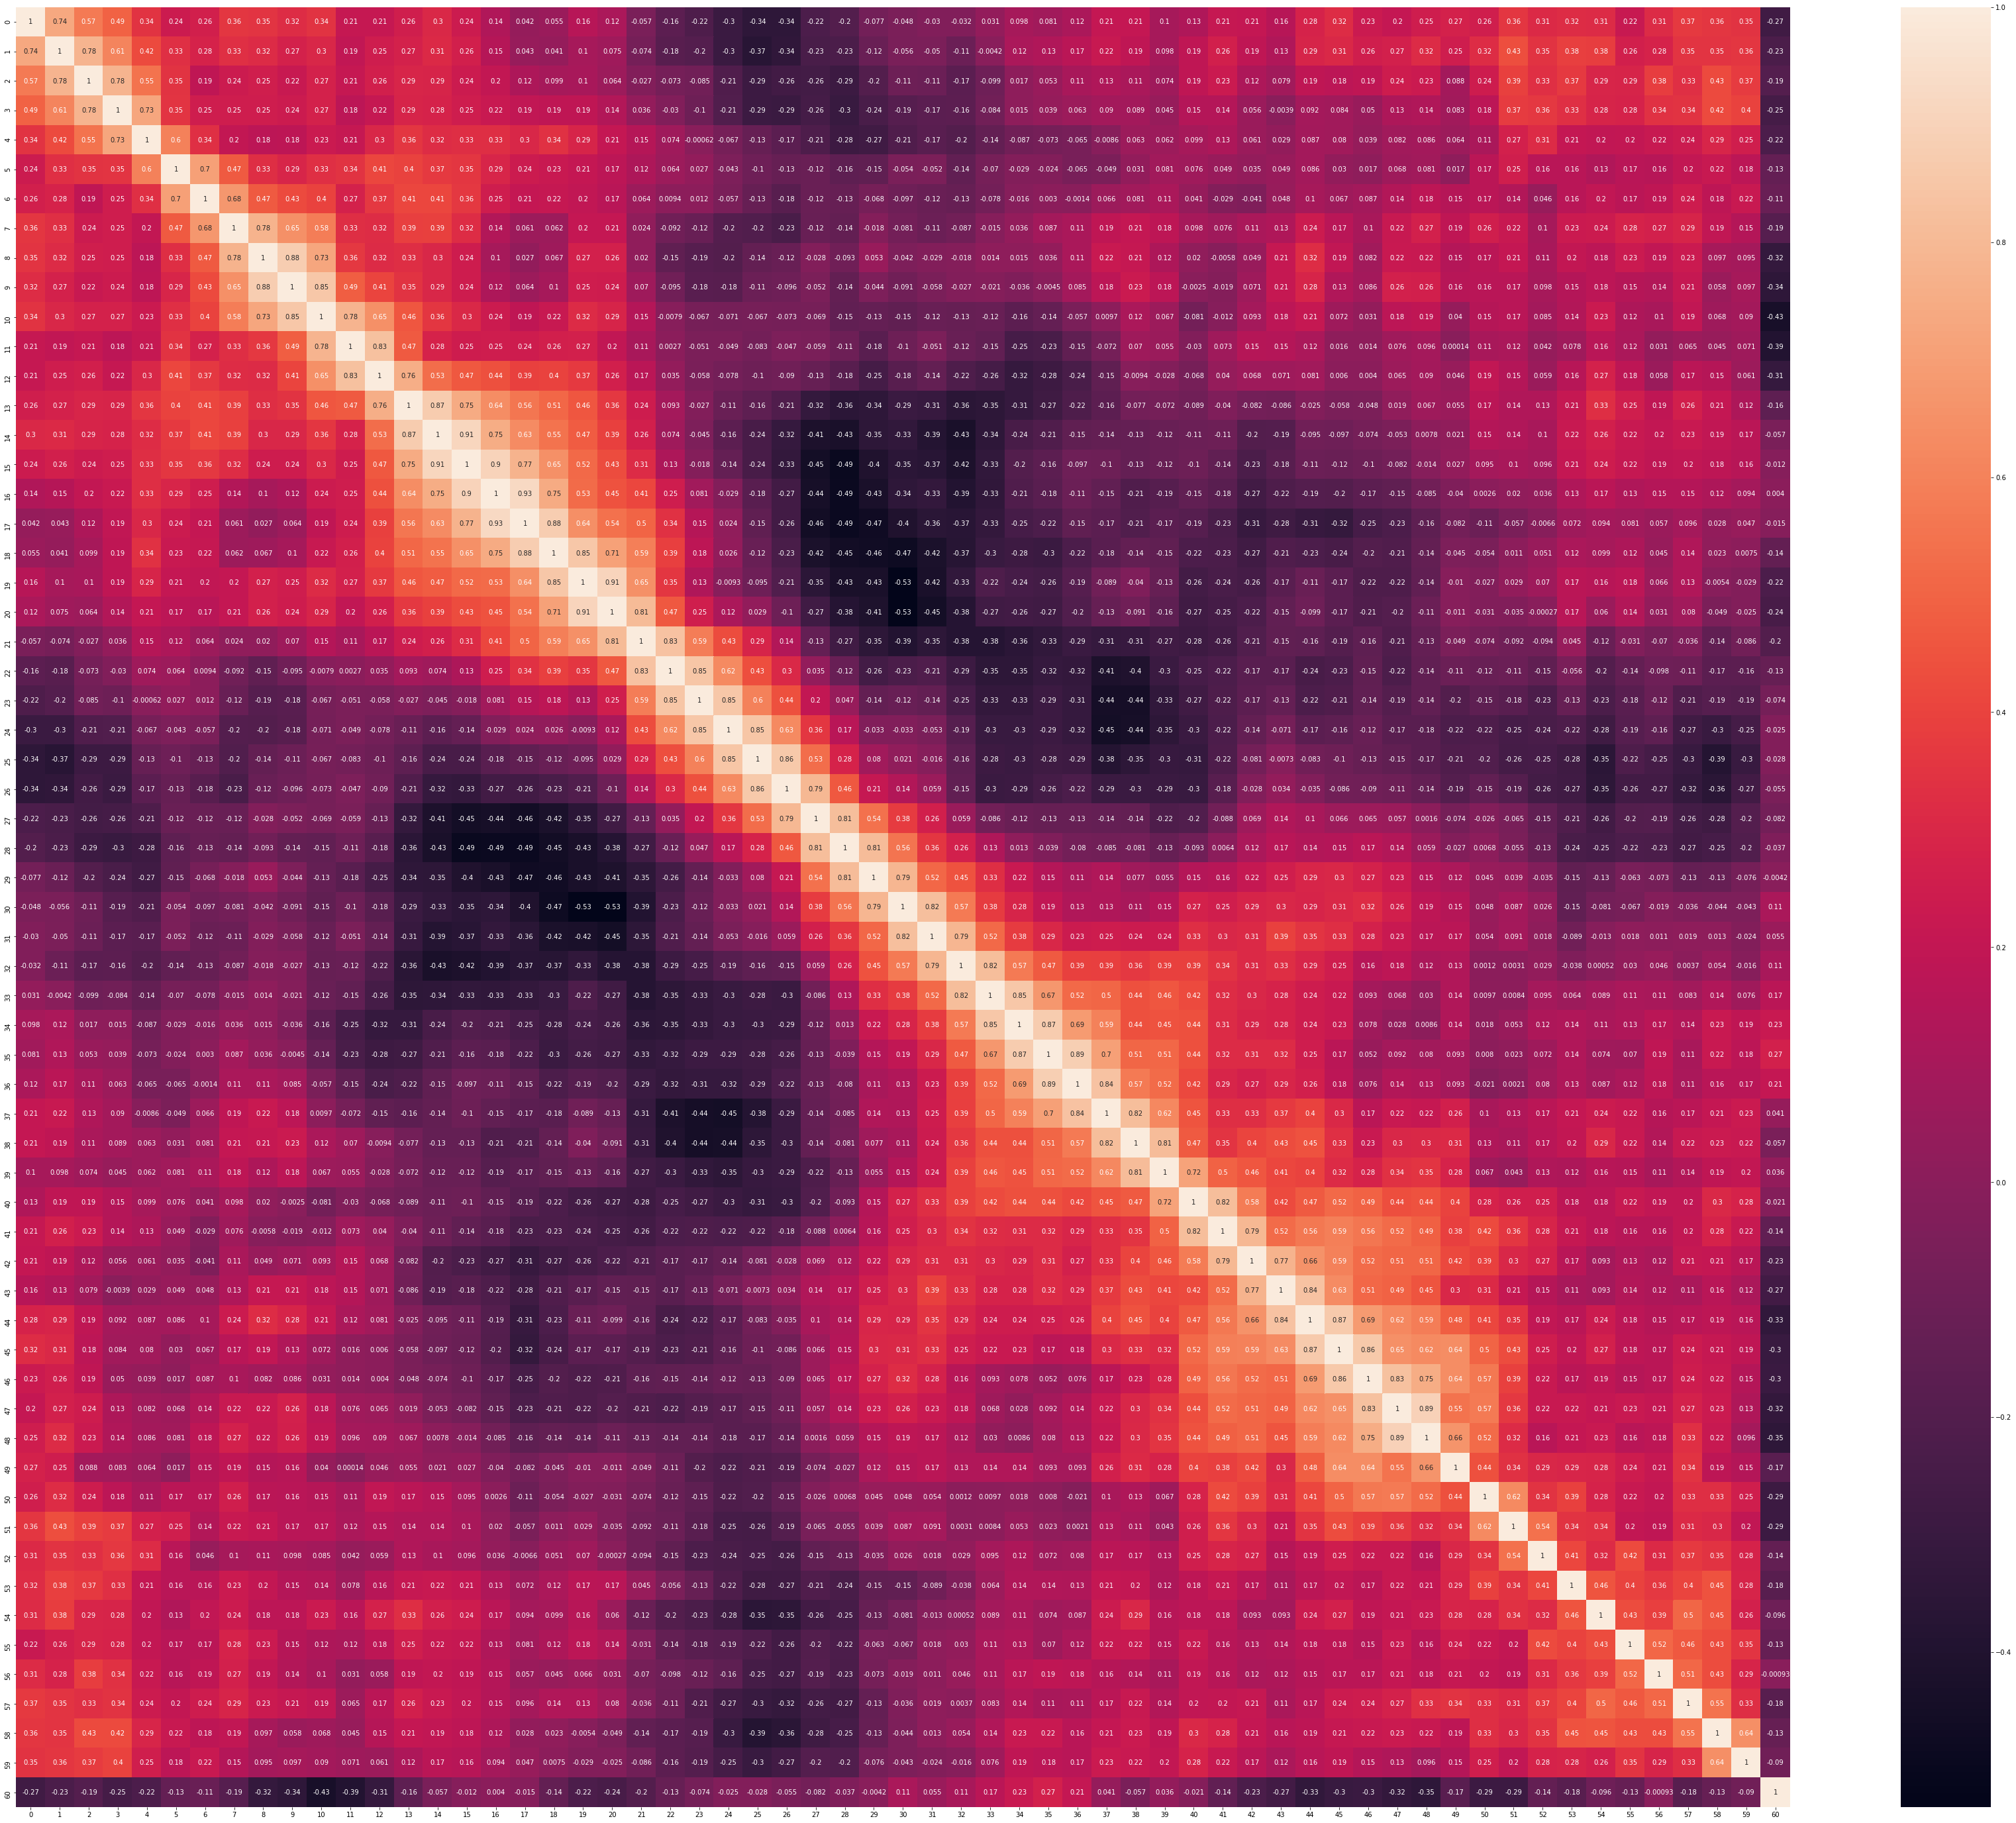

In [24]:
corr_=df.corr()
plt.figure(figsize=(60,50))
sns.heatmap(corr_,annot=True)
#plt.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001680F0D1E08>,
      dtype=object)

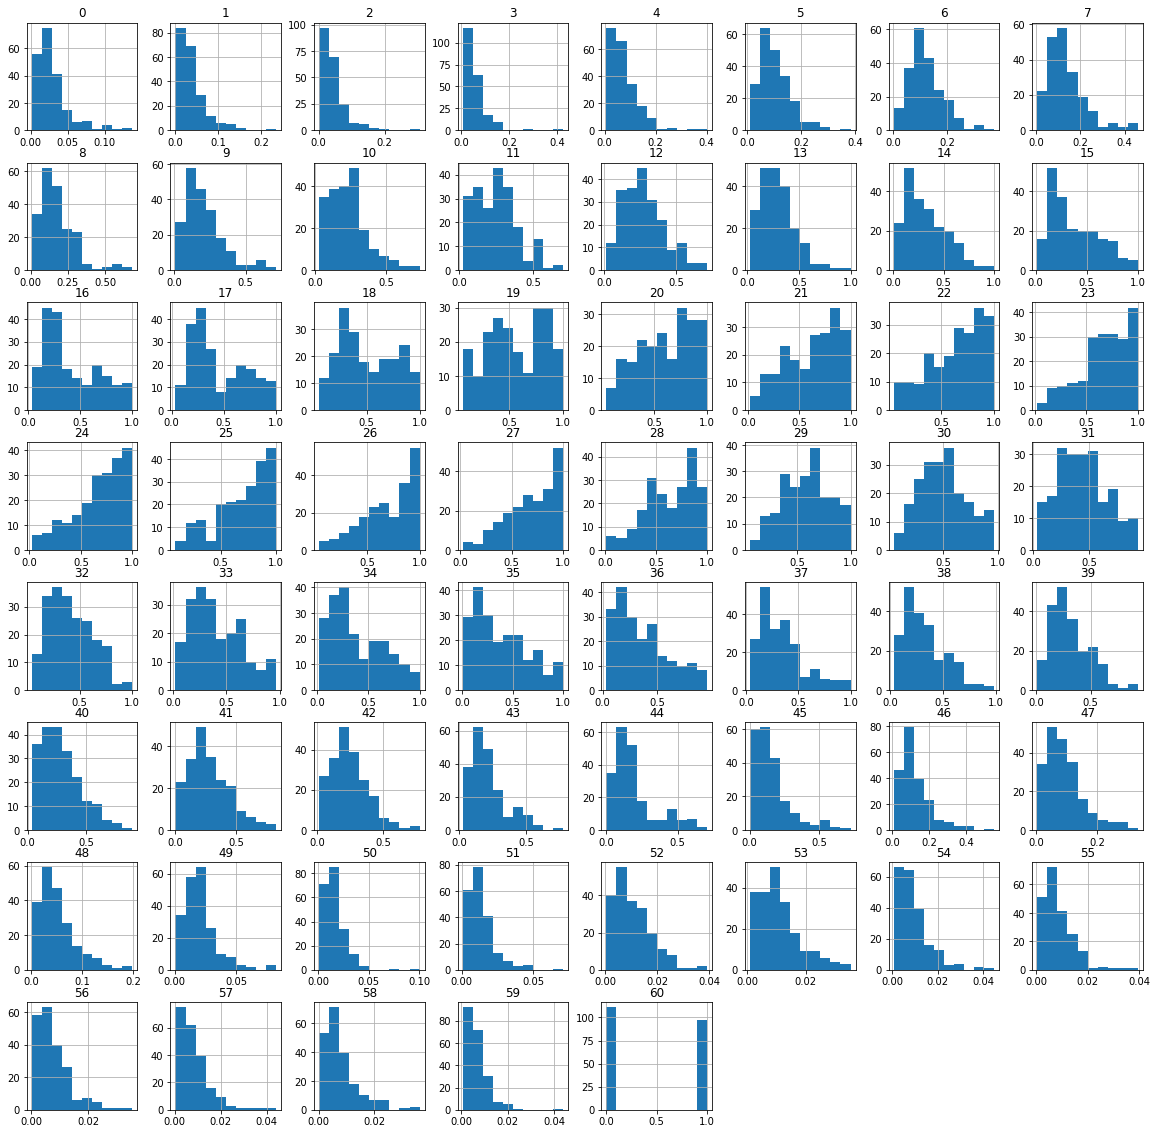

In [25]:
df.hist(figsize=(20,20))

In [26]:
df.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
        ...   
56    1.653090
57    2.098330
58    1.737506
59    2.775754
60    0.135903
Length: 61, dtype: float64

In [27]:
#skewness removal
#log transform works if thr is no 0 data and for +ve skew 
def removeSkew(df,col):
    print("column :",col," ,skewness :",df[col].skew())
    if(df[col].skew()>0.55):
        df[col]= np.log1p(df[col])
        print("After log transform: column :",col," ,skewness :",df[col].skew())    



In [28]:
for col in df.columns:
    removeSkew(df,col)

column : 0  ,skewness : 2.1310884036179263
After log transform: column : 0  ,skewness : 2.0360008853161005
column : 1  ,skewness : 2.1556436669002847
After log transform: column : 1  ,skewness : 1.9699168533041251
column : 2  ,skewness : 2.6525178027721217
After log transform: column : 2  ,skewness : 2.3447130344396525
column : 3  ,skewness : 3.4016974370591417
After log transform: column : 3  ,skewness : 2.8183198738962507
column : 4  ,skewness : 2.018140508448359
After log transform: column : 4  ,skewness : 1.6986839479923794
column : 5  ,skewness : 1.2481657456456892
After log transform: column : 5  ,skewness : 1.0338442126338123
column : 6  ,skewness : 0.9708203074544366
After log transform: column : 6  ,skewness : 0.7806820507186173
column : 7  ,skewness : 1.481106640375856
After log transform: column : 7  ,skewness : 1.217942375376725
column : 8  ,skewness : 1.6338699131287824
After log transform: column : 8  ,skewness : 1.2636185786260057
column : 9  ,skewness : 1.28125841540716

In [29]:
df.shape

(208, 61)

In [30]:
#check outlier

#df.plot(kind='box',subplots=True,layout=(30,3))
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(173, 61)

In [31]:
x=df.drop(60,axis=1)
x.shape

(173, 60)

In [32]:
y=df.iloc[:,-1]
y.shape

(173,)

In [33]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.26106922,  0.32092974,  0.29637543, ...,  0.47681609,
         0.52848189, -0.6937637 ],
       [ 1.51556839,  1.03306031,  1.89190929, ..., -0.32205806,
        -0.30446331, -0.35937306],
       [-0.97547872, -0.63215379,  1.05384471, ..., -0.43641001,
        -0.56815293,  1.66626896],
       ...,
       [ 1.99264534,  0.63141788, -0.68769803, ...,  1.70394181,
         0.24388049, -0.72164764],
       [ 0.46748725,  0.23590819,  0.53873687, ...,  0.36286112,
        -0.65611951, -0.24799828],
       [ 0.1642222 ,  0.28316062, -0.86479286, ..., -0.6194916 ,
        -0.10690259,  1.61096692]])

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

r_score=cross_val_score(DecisionTreeClassifier(),x,y,cv=10)
print(r_score.mean())

r_score=cross_val_score(LogisticRegression(),x,y,cv=10)
print(r_score.mean())


r_score=cross_val_score(SVC(),x,y,cv=10)
print(r_score.mean())


r_score=cross_val_score(GaussianNB(),x,y,cv=10)
print(r_score.mean())

#MultinomialNB works for +ve data set
#r_score=cross_val_score(MultinomialNB(),x,y,cv=5)
#print(r_score.mean())




parameters={"n_neighbors":range(1,30)}
knc= KNeighborsClassifier()
gdcv=GridSearchCV(knc,parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

knc= KNeighborsClassifier(n_neighbors=28)
r_score=cross_val_score(knc,x,y,cv=10)
print(r_score.mean())

#only use in rgression pro.So here it gives -ve value
parameters={"alpha":[0.001,0.01,0.1,1.0]}
lsreg= Lasso()
gdcv=GridSearchCV(lsreg,parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

lsreg= Lasso(alpha=1.0)
r_score=cross_val_score(lsreg,x,y,cv=10)
print(r_score.mean())

#only use in rgression pro.So here it gives -ve value
parameters={"alpha":[0.001,0.01,0.1,1.0]}
rgreg= Ridge()
gdcv=GridSearchCV(rgreg,parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

rgreg= Ridge(alpha=1.0)
r_score=cross_val_score(rgreg,x,y,cv=10)
print(r_score.mean())

0.6496732026143792
0.7003267973856209
0.7352941176470589
0.6944444444444444
{'n_neighbors': 28}
0.7183006535947711
{'alpha': 1.0}
-0.4267137676692965
{'alpha': 1.0}
-0.6551322913324313


In [35]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

parameters={"learning_rate":[0.001,0.01,0.1,1.0],"n_estimators":[10,100,500,1000]}
gdcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)


{'learning_rate': 1.0, 'n_estimators': 10}


In [36]:
gboostc=GradientBoostingClassifier(learning_rate=1,n_estimators=10)
r_score=cross_val_score(gboostc,x,y,cv=10)
print(r_score.mean())

0.7758169934640523


In [37]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1.0],"n_estimators":[10,100,500,1000],"base_estimator":[LogisticRegression(),DecisionTreeClassifier()]}
gdcv=GridSearchCV(AdaBoostClassifier(),parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

ada_boost_class=AdaBoostClassifier(learning_rate=0.01,n_estimators=500,base_estimator=LogisticRegression())
r_score=cross_val_score(ada_boost_class,x,y,cv=10)
print(r_score.mean())






{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'learning_rate': 0.01, 'n_estimators': 500}
0.7526143790849673


In [38]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier

parameters={"n_estimators":[10,100,500,1000,1500]}
gdcv=GridSearchCV(RandomForestClassifier(),parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)


{'n_estimators': 1000}


In [39]:
randm_cl=RandomForestClassifier(n_estimators=1000)
r_score=cross_val_score(randm_cl,x,y,cv=10)
print(r_score.mean())

0.7408496732026143


In [40]:

def findRandState(classifier_model):
    max_r2_sc=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=r_state)
        classifier_model.fit(x_train,y_train)
        y_pred=classifier_model.predict(x_test)
        r2_sc=r2_score(y_test,y_pred)
        print("max r2 score corresponding to random state : ",r_state,"   is : ",r2_sc)   
        if(r2_sc>max_r2_sc):
            max_r2_sc=r2_sc
            final_r_state=r_state
            
    print("max r2 score corresponding to random state : ",final_r_state,"   is : ",max_r2_sc)
   

In [41]:
findRandState(gboostc)

max r2 score corresponding to random state :  42    is :  -0.050000000000000044
max r2 score corresponding to random state :  43    is :  0.41666666666666674
max r2 score corresponding to random state :  44    is :  0.04761904761904767
max r2 score corresponding to random state :  45    is :  0.5394736842105263
max r2 score corresponding to random state :  46    is :  -0.37254901960784337
max r2 score corresponding to random state :  47    is :  0.388111888111888
max r2 score corresponding to random state :  48    is :  0.19934640522875813
max r2 score corresponding to random state :  49    is :  0.5104895104895104
max r2 score corresponding to random state :  50    is :  -0.25816993464052307
max r2 score corresponding to random state :  51    is :  0.5104895104895104
max r2 score corresponding to random state :  52    is :  -0.0714285714285714
max r2 score corresponding to random state :  53    is :  0.3137254901960783
max r2 score corresponding to random state :  54    is :  -0.22377

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=57)

gboostc.fit(x_train,y_train)
print(gboostc.score(x_train,y_train))
y_pred=gboostc.predict(x_test)
r2_sc=r2_score(y_test,y_pred)
mean_abs_error=mean_absolute_error(y_test,y_pred)
mean_sqr_error=mean_squared_error(y_test,y_pred)
    
print("r2_score : ",r2_sc,"mean_abs_error",mean_abs_error,"mean_sqr_error",mean_sqr_error)
print("accuracy score::",accuracy_score(y_test,y_pred))
print("confusion matrix::")
print(confusion_matrix(y_test,y_pred))
print("classification report::",classification_report(y_test,y_pred))
    

1.0
r2_score :  0.6568627450980391 mean_abs_error 0.08571428571428572 mean_sqr_error 0.08571428571428572
accuracy score:: 0.9142857142857143
confusion matrix::
[[16  2]
 [ 1 16]]
classification report::               precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.89      0.94      0.91        17

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35



In [43]:
from sklearn.externals import joblib
joblib.dump(gboostc,'gradientboostingclassifier_sonar.pkl')

C:\Users\kamalakanta.sahu\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['gradientboostingclassifier_sonar.pkl']